Cleaning Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_squared_error

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv("weather_PhnomPenh.csv")
data=data[['Time','Temp','Weather','Wind','Humidity','Barometer','Visibility','Date']]

In [ ]:
df = pd.read_csv("weather_PhnomPenh.csv",parse_dates=["Date"],index_col="Date") 
df

                  Time   Temp          Weather    Wind Humidity  Barometer  \
Date                                                                         
2024-07-01        0:00  28 °C  Passing clouds.  4 km/h      94%  1009 mbar   
2024-07-01  Mon, 1 Jul    NaN              NaN     NaN      NaN        NaN   
2024-07-01        0:30  28 °C  Passing clouds.  2 km/h      94%  1009 mbar   
2024-07-01         NaN    NaN              NaN     NaN      NaN        NaN   
2024-07-01        1:00  28 °C  Passing clouds.  4 km/h      94%  1009 mbar   
...                ...    ...              ...     ...      ...        ...   
2024-12-31       21:30  28 °C  Passing clouds.  7 km/h      66%  1011 mbar   
2024-12-31       22:00  28 °C  Passing clouds.  7 km/h      66%  1011 mbar   
2024-12-31       22:30  28 °C  Passing clouds.  6 km/h      66%  1011 mbar   
2024-12-31       23:00  28 °C  Passing clouds.  6 km/h      66%  1011 mbar   
2024-12-31       23:30  27 °C  Passing clouds.  6 km/h      70% 

C:\Users\hp\AppData\Local\Temp\ipykernel_6884\210601945.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("weather_PhnomPenh.csv",parse_dates=["Date"],index_col="Date")


In [4]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Time            15
Temp           199
Weather        199
Wind           200
Humidity       199
Barometer      201
Visibility    5043
dtype: int64


In [5]:
df.head()

,Time,Temp,Weather,Wind,Humidity,Barometer,Visibility
Date,,,,,,,
2024-07-01,0:00,28 °C,Passing clouds.,4 km/h,94%,1009 mbar,9 km
2024-07-01,"Mon, 1 Jul",NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,0:30,28 °C,Passing clouds.,2 km/h,94%,1009 mbar,9 km
2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,1:00,28 °C,Passing clouds.,4 km/h,94%,1009 mbar,9 km


In [6]:
df

,Time,Temp,Weather,Wind,Humidity,Barometer,Visibility
Date,,,,,,,
2024-07-01,0:00,28 °C,Passing clouds.,4 km/h,94%,1009 mbar,9 km
2024-07-01,"Mon, 1 Jul",NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,0:30,28 °C,Passing clouds.,2 km/h,94%,1009 mbar,9 km
2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,1:00,28 °C,Passing clouds.,4 km/h,94%,1009 mbar,9 km
...,...,...,...,...,...,...,...
2024-12-31,21:30,28 °C,Passing clouds.,7 km/h,66%,1011 mbar,9 km
2024-12-31,22:00,28 °C,Passing clouds.,7 km/h,66%,1011 mbar,9 km
2024-12-31,22:30,28 °C,Passing clouds.,6 km/h,66%,1011 mbar,9 km


 MODEL  ( xgboost Model )

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [8]:
# Step 1: Load Data
file_path = "weather_PhnomPenh.csv"
df = pd.read_csv(file_path, encoding="latin1")  # Adjust encoding if needed

Process Data

In [9]:
# Re-read the dataset (if needed)
file_path = "weather_PhnomPenh.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Step 1: Clean Column Names
df.columns = df.columns.str.strip()  # Strip whitespace
df.rename(columns={"ï»¿Time": "Time"}, inplace=True)  # Rename malformed column

# Step 2: Combine Date and Time into Datetime
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")

# Step 3: Set Datetime as Index
df.set_index("Datetime", inplace=True)

# Step 4: Drop Redundant Columns
df.drop(columns=["Date", "Time"], inplace=True)
df["Temp"] = df["Temp"].str.extract(r"(\d+)").astype(float)

# Clean 'Wind' column (extract numeric wind speed)
df["Wind"] = df["Wind"].str.extract(r"(\d+)").astype(float)

# Clean 'Visibility' column (extract numeric visibility)
df["Visibility"] = df["Visibility"].str.extract(r"(\d+)").astype(float)

# Clean 'Humidity' column (remove '%' and convert to numeric)
df["Humidity"] = df["Humidity"].str.replace("%", "").astype(float)

# Clean 'Barometer' column (remove 'mbar' and convert to numeric)
df["Barometer"] = df["Barometer"].str.replace("mbar", "").astype(float)


# Step 5: Preview the Cleaned Data
print(df.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_6884\3638493849.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")


                     Temp          Weather  Wind  Humidity  Barometer  \
Datetime                                                                
2024-07-01 00:00:00  28.0  Passing clouds.   4.0      94.0     1009.0   
NaT                   NaN              NaN   NaN       NaN        NaN   
2024-07-01 00:30:00  28.0  Passing clouds.   2.0      94.0     1009.0   
NaT                   NaN              NaN   NaN       NaN        NaN   
2024-07-01 01:00:00  28.0  Passing clouds.   4.0      94.0     1009.0   

                     Visibility  
Datetime                         
2024-07-01 00:00:00         9.0  
NaT                         NaN  
2024-07-01 00:30:00         9.0  
NaT                         NaN  
2024-07-01 01:00:00         9.0  


In [10]:
df["Visibility"].fillna(9, inplace = True)
# df["Temp"].fillna(28, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6884\1024776212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Visibility"].fillna(9, inplace = True)


In [11]:
df

,Temp,Weather,Wind,Humidity,Barometer,Visibility
Datetime,,,,,,
2024-07-01 00:00:00,28.0,Passing clouds.,4.0,94.0,1009.0,9.0
NaT,NaN,NaN,NaN,NaN,NaN,9.0
2024-07-01 00:30:00,28.0,Passing clouds.,2.0,94.0,1009.0,9.0
NaT,NaN,NaN,NaN,NaN,NaN,9.0
2024-07-01 01:00:00,28.0,Passing clouds.,4.0,94.0,1009.0,9.0
...,...,...,...,...,...,...
2024-12-31 21:30:00,28.0,Passing clouds.,7.0,66.0,1011.0,9.0
2024-12-31 22:00:00,28.0,Passing clouds.,7.0,66.0,1011.0,9.0
2024-12-31 22:30:00,28.0,Passing clouds.,6.0,66.0,1011.0,9.0


In [12]:
# Step 3: Feature Engineering
# Create lag features for Temp(celcius)
for lag in range(1, 6):  # Create lag features for the past 5 time steps
    df[f"Temp_lag_{lag}"] = df["Temp"].shift(lag)

# Drop rows with NaN values created due to lagging
df = df.dropna()

In [13]:
df.drop(columns=["Weather"], inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_6884\3472776755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Weather"], inplace=True)


In [14]:
df.describe()

,Temp,Wind,Humidity,Barometer,Visibility,Temp_lag_1,Temp_lag_2,Temp_lag_3,Temp_lag_4,Temp_lag_5
count,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000
mean,28.988024,10.316938,81.730111,1007.708868,8.964500,28.975050,28.959937,28.943541,28.926575,28.906188
std,2.545774,6.161550,14.646138,2.560811,0.597079,2.556049,2.566379,2.575251,2.584027,2.592321
min,21.000000,2.000000,44.000000,998.000000,0.000000,21.000000,21.000000,21.000000,21.000000,21.000000
25%,27.000000,6.000000,70.000000,1006.000000,9.000000,27.000000,27.000000,27.000000,27.000000,27.000000
50%,29.000000,9.000000,84.000000,1008.000000,9.000000,29.000000,29.000000,29.000000,29.000000,29.000000
75%,31.000000,13.000000,94.000000,1009.000000,9.000000,31.000000,31.000000,31.000000,31.000000,31.000000
max,37.000000,87.000000,100.000000,1017.000000,16.000000,37.000000,37.000000,37.000000,37.000000,37.000000


In [15]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 8305
Number of columns: 8


In [16]:
# Step 4: Split Data(Spit data 20%for test, 80% for training)
X = df.drop(columns=["Temp"])  # Features
y = df["Temp"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [17]:
print(X_train.dtypes)


Wind          float64
Humidity      float64
Barometer     float64
Visibility    float64
Temp_lag_1    float64
Temp_lag_2    float64
Temp_lag_3    float64
Temp_lag_4    float64
Temp_lag_5    float64
dtype: object


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming you already have your data (X_train, y_train) ready
# Convert to DMatrix format (native xgboost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for the model
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',            # Evaluation metric (Root Mean Squared Error)
    'max_depth': 6,                   # Depth of the tree
    'learning_rate': 0.05,            # Learning rate
    'n_estimators': 1000,             # Number of boosting rounds
}

# Train the model
num_boost_round = 1000
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

#Step6  Predict on the test set
y_pred = model.predict(dtest)

# Evaluate performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'RMSE: {rmse}')


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 1.3674810534499566


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

In [ ]:
# Forcasting next 100:

# Assuming 'model' is your trained XGBoost model
# 'X_train' was used to train the model
# 'X_test' is the test input

# Feature names (from training data)
feature_names = X_train.columns.tolist()

# Recursive Forecasting
n_steps = 100  # Number of steps to forecast
forecasted_values = []

# Start with the last row of the test set
last_input = X_test.iloc[-1].values

for _ in range(n_steps):
    # Create a DataFrame for the current input with the correct feature names
    current_input_df = pd.DataFrame([last_input], columns=feature_names)
    
    # Convert to DMatrix
    dmatrix_last_input = xgb.DMatrix(current_input_df)
    
    # Predict the next step
    next_pred = model.predict(dmatrix_last_input)
    forecasted_values.append(next_pred[0])  # Save the prediction

    # Update the input for the next prediction
    # Here, assume the new prediction replaces the oldest lag feature
    last_input = np.roll(last_input, -1)  # Shift values to the left
    last_input[-1] = next_pred  # Add the new prediction as the latest value

# Convert the forecasted values to a DataFrame for easy viewing
forecasted_df = pd.DataFrame({
    'Step': range(1, n_steps + 1),
    'Forecasted_Temperature': forecasted_values
})



C:\Users\hp\AppData\Local\Temp\ipykernel_6884\2853642483.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_input[-1] = next_pred  # Add the new prediction as the latest value
C:\Users\hp\AppData\Local\Temp\ipykernel_6884\2853642483.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_input[-1] = next_pred  # Add the new prediction as the latest value
C:\Users\hp\AppData\Local\Temp\ipykernel_6884\2853642483.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.

    Step  Forecasted_Temperature
0      1               28.914993
1      2               26.604233
2      3               31.309849
3      4               30.916481
4      5               31.859919
..   ...                     ...
95    96               34.452370
96    97               31.816278
97    98               34.266869
98    99               33.919640
99   100               32.744316

[100 rows x 2 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_6884\2853642483.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_input[-1] = next_pred  # Add the new prediction as the latest value


In [35]:
forecasted_df.values

array([[  1.        ,  28.91499329],
       [  2.        ,  26.60423279],
       [  3.        ,  31.30984879],
       [  4.        ,  30.91648102],
       [  5.        ,  31.85991859],
       [  6.        ,  31.24689674],
       [  7.        ,  30.30710411],
       [  8.        ,  35.51237869],
       [  9.        ,  34.40447617],
       [ 10.        ,  35.25170517],
       [ 11.        ,  35.28042221],
       [ 12.        ,  33.08214188],
       [ 13.        ,  34.70148849],
       [ 14.        ,  34.35060501],
       [ 15.        ,  34.95365143],
       [ 16.        ,  34.15244675],
       [ 17.        ,  33.17982864],
       [ 18.        ,  34.32105637],
       [ 19.        ,  34.46046829],
       [ 20.        ,  34.38517761],
       [ 21.        ,  33.74817276],
       [ 22.        ,  33.07344437],
       [ 23.        ,  34.37657547],
       [ 24.        ,  34.42400742],
       [ 25.        ,  33.7202034 ],
       [ 26.        ,  32.91989517],
       [ 27.        ,  32.97405243],
 

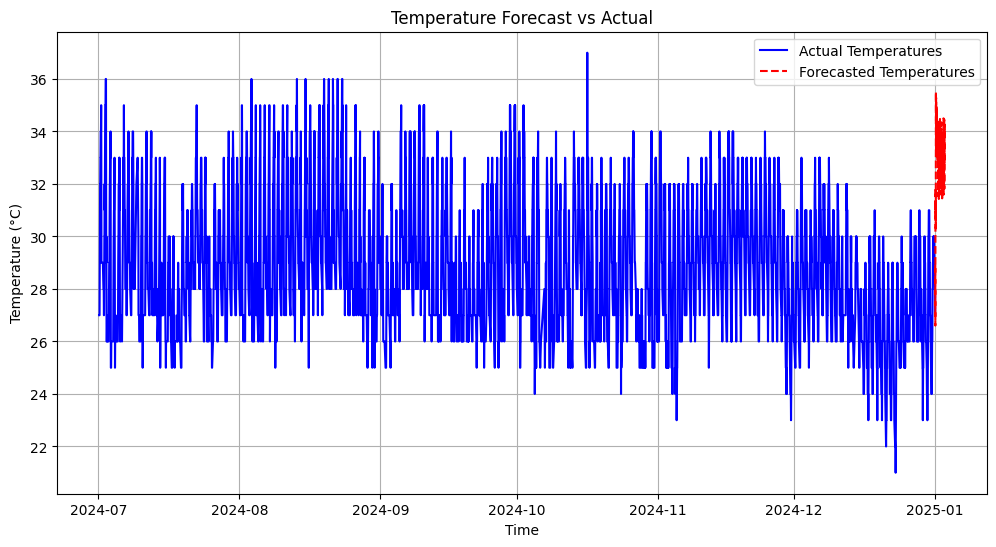

In [20]:
# step 8 : Visualization

# Assuming 'df' is your original dataset with a datetime index
# 'forecasted_df' contains the forecasted temperatures

# Create a time series index for the forecast
forecast_start = df.index[-1]  # Last index of the original dataset
forecast_steps = pd.date_range(start=forecast_start, periods=len(forecasted_df) + 1, freq='30min')[1:]

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temp"], label="Actual Temperatures", color="blue")

# Plot forecasted data
plt.plot(forecast_steps, forecasted_df["Forecasted_Temperature"], label="Forecasted Temperatures", color="red", linestyle="dashed")

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecast vs Actual")
plt.legend()
plt.grid()
plt.show()


In [21]:
# Calculate Accuracy:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'y_test' contains the actual temperature values for the test set
# and 'y_pred' contains the predicted values for the same period

# Calculate Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Avoid divide-by-zero for exact 0s
r2 = r2_score(y_test, y_pred)

# Print Results
print("Model Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


Model Evaluation Metrics:
RMSE: 1.3675
MAE: 1.0373
MAPE: 3.88%
R²: 0.6318
